In [3]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [4]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [5]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.LAST_OPTIMAL.value(shrinkage_type="linear")

In [6]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [7]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [01:05<00:00,  4.30it/s]


StrategyStatistics:
* final_nav = 12.231917
* geom_avg_total_r = 0.140770
* geom_avg_xs_r = 0.132991
* std_xs_r = 0.149028
* min_xs_r = -0.075996
* max_xs_r = 0.101874
* skew = 0.114143
* kurtosis = 12.560976
* max_dd = -0.250928
* sharpe = 0.892391
* alpha_buy_hold = 0.063198
* tracking_error_buy_hold = 0.150353
* ir_buy_hold = 0.420332
* factor_loadings = {'low_risk': 0.5152149450126061, 'momentum': -0.04689381959396689, 'quality': 0.1313340369167982, 'size': 0.05902390548345529, 'value': -0.20581559507529523, 'spx': 0.7110071002266056}
* alpha_benchmark = 0.064645
* alpha_benchmark_pvalue = 0.003090
* tracking_error_benchmark = 0.091801
* ir_benchmark = 0.704182
* ttest_pval = 0.227212
* levene_pval = 0.000000
* timing_ability_coef = -0.033397
* timing_ability_pval = 0.045294

In [8]:
result.std_xs_r, result.sharpe

(0.1490277701358168, 0.8923907144181749)

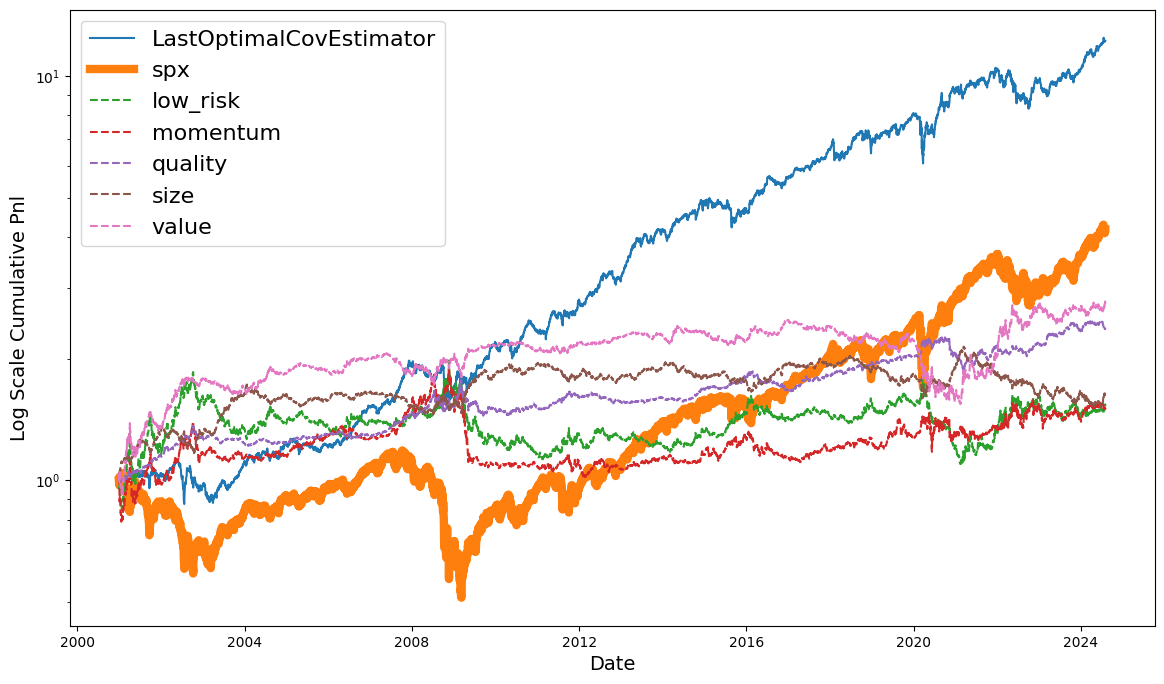

In [9]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

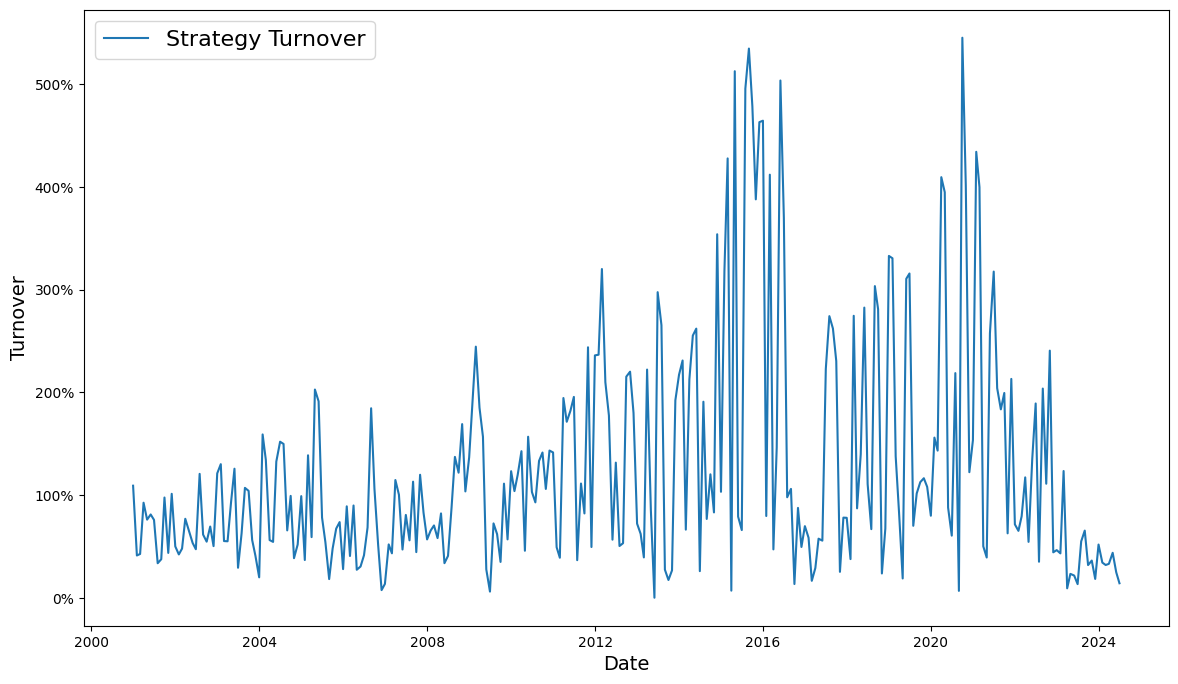

In [10]:
runner.plot_turnover()

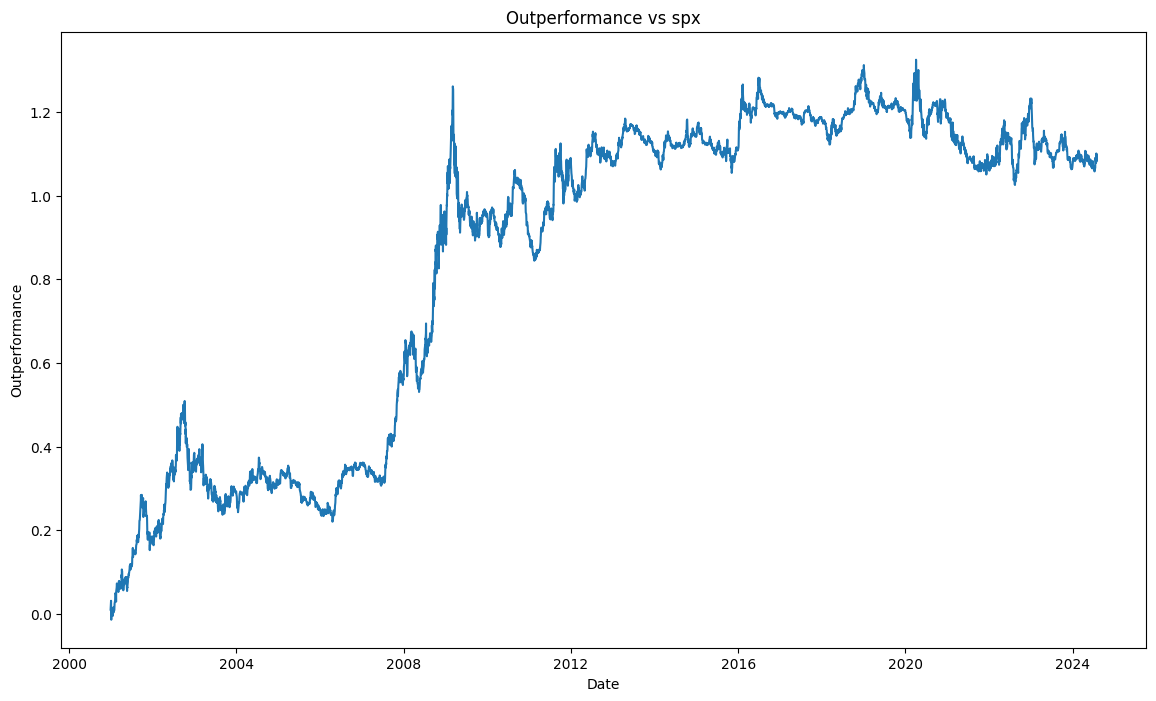

In [11]:
runner.plot_outperformance(mkt_only=True)

In [12]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")